---
author: Rishabh Mondal
title: Introduction to Univariate distribution and Sampling 
date: '2023-07-07'
---

This blog is your gateway to delve into various commonly used univariate sampling. Here, you will find intriguing insights into the stories behind these distributions. For example, you will discover that the outcome of a coin flip follows a Bernoulli distribution. We provide comprehensive information about each distribution, including their probability mass or probability density functions, moments, and 
more. Additionally, we offer implementations of these distributions using PyTorch, allowing you to explore and 
experiment with different flavors and variations of each distribution.

### Pre-defined values

In [29]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import math
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Preliminary study


****Random variables**** : If the value of X is unknown and/or could change, we call it a ***random*** variable or ***rv***. The set of possible values, denoted X, is known as the ***sample space***.

****Discrete rv**** : If the sample space X is finite or countably infinite, then X is called a discrete random variable.

****Continuous rv****: If $X \in \mathbb{R}$ is a real-valued quantity, it is called a continuous random variable.

****Probability mass function or PMF**** : Let $X$ be a discrete rv with possible outcomes 
$\chi$. Then, $f_X(x):R→[0,1]$ is the PMF of X.
$$\sum_{x\in X}f_X = 1$$

****Cumulative distribution function of CDF**** : The cdf random variable $X$ at a given value $x$ is defined as the probability that $X$ is smaller than $x$ : $$F_X(x) = P(X \leq x)$$.

$1.$ If X is a discrete rv with possible outcomes $\chi$ and the pmf $f_X(x)$ then ***cdf*** is the function $F_X(x) : \mathbb{R} \to [0, 1]$ with ,
$$F_X(x) = \sum_{t \in X: t \leq x} f_X(t)$$

$2.$ If X is a continuous rv with possible outcomes $\chi$ and the pdf $f_X(x)$ then ***cdf*** is the function $F_X(x) : \mathbb{R} \to [0, 1]$ with ,
$$F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt$$

****Inverse CDF or Quantile function**** :Let $X$ be a random variable with the CDF $F_X(x)$. Then, the function $Q_X(p) : [0, 1] \to \mathbb{R}$ which is the inverse CDF is the quantile function (QF) of $X$. More precisely, the QF is the function that, for a given quantile $p \in [0, 1]$ , returns the smallest x for which $F_X(x) = p$:
$$Q_X(p) = \min\{x \in \mathbb{R} \,|\, F_X(x) = p\}$$








## Univariate discrete distributions

### Discrete uniform distribution

****Definition**** : Let $X$ be a discrete rv. Then $X$ is said to be uniformly distributed with minimum $a$ and maximum $b$

$$X \sim U(a,b)$$

****Support**** : $(a,b)$

****PDF**** :
$$f_X(x) = \frac{1}{b - a + 1}, \quad \text{where } x \in \{a, a+1, \ldots, b-1, b\}$$

****CDF****:
$$F(x) = \begin{cases}
0 & \text{if } x < a \\
\frac{{x - a}}{{b - a}} & \text{if } a \leq x < b \\
1 & \text{if } x \geq b \\
\end{cases}
$$

****Inverse CDF**** : $$F^{-1}(u) = a + (b - a)u$$

****pdf plot****

****cdf plot****

In [262]:
def plot(x,y):
    plt.figure(figsize=(6, 4))
    y = cdf_fn(x)
    plt.plot(x, y)
    plt.ylabel("cdf")
    plt.xlabel("support")
    plt.show()

In [197]:
from scipy.stats import norm
a = -5
b = 5
x = torch.linspace(a,b,1000)
cdf = norm.cdf(x, loc=0, scale=1)
plot(cdf)
plt.xlabel("x")
plt.ylabel("CDF")

TypeError: 'numpy.ndarray' object is not callable

<Figure size 1200x800 with 0 Axes>

****PDF of uniform distribution****

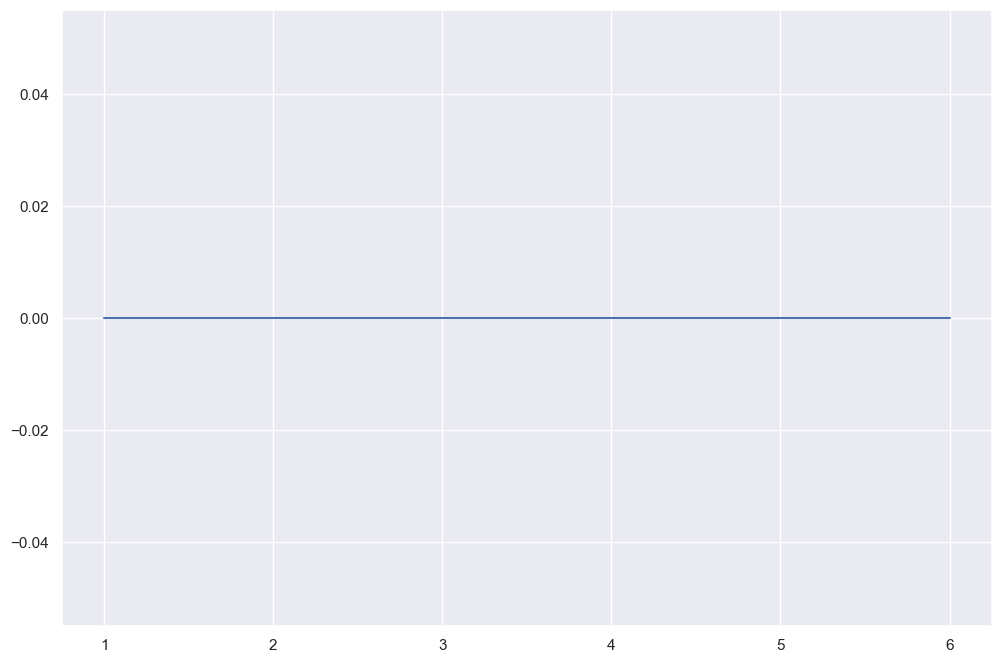

In [194]:
a=1
b=6
pmf = 1 / (b - a)
plot(lambda y: y==(1 /(b-a)))

#pmf_plot(x,distribution)
#plt.xlabel("support")
#plt.ylabel("p(x)")


***CDF of uniform distribution***

Text(0, 0.5, 'cdf')

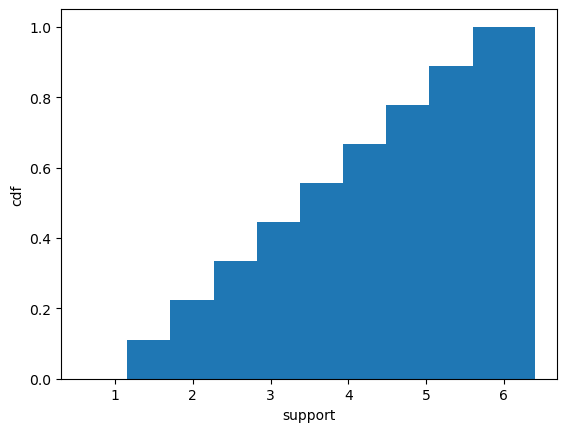

In [84]:
a=1
b=6
sample=torch.linspace(1,6,10)
cdf = torch.where(sample < a, torch.tensor(0.0), torch.where(sample > b, torch.tensor(1.0), (sample - a) / (b - a)))
plt.bar(sample,cdf)
plt.xlabel("support")
plt.ylabel("cdf")

### Bernoulli distribution 

****Definition**** : Let $X$ be a random variable. Then, $X$ is said to follow a Bernoulli distribution with success probability $p$ $$X \sim Bern(p)$$ 

****PMF****:
$$
f(x, p) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 \\
\end{cases}
$$

****PMF of bernoulli distribution****

Text(0.5, 0, 'support')

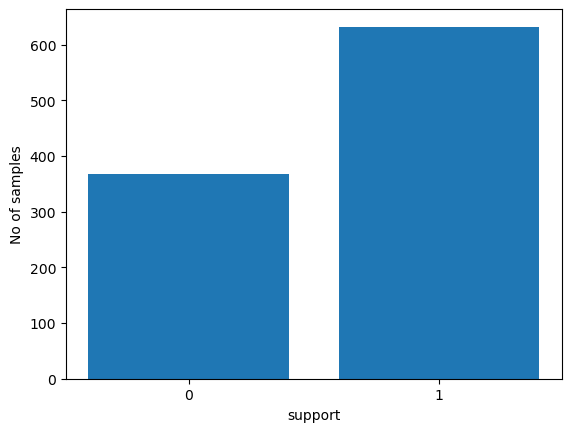

In [85]:
from torch.distributions import Bernoulli
p=torch.tensor(0.4)
bernoulli=Bernoulli(probs=p)
bernoulli_samples = bernoulli.sample((1000,))
x=[0,1]
f=[]
s=[]
for i in bernoulli_samples:
    if i == 1:
        s.append(i)
    else:
        f.append(i)   
categories=['0','1']
plt.bar(categories,[len(s),len(f)])
plt.ylabel("No of samples")
plt.xlabel("support")

****CDF of Bernoulli distribution**** 

Text(0, 0.5, 'CDF')

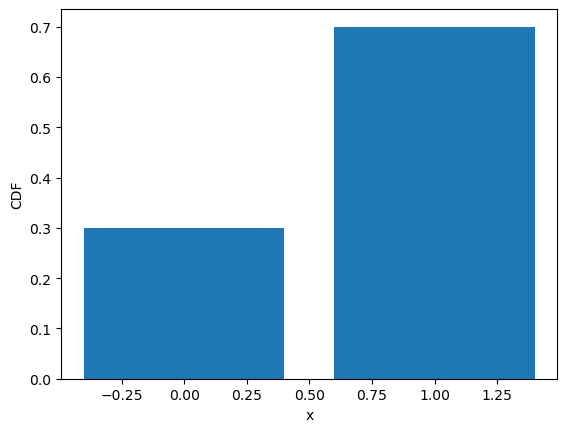

In [8]:
p = 0.7
bernoulli_dist = dist.Bernoulli(probs=torch.tensor(p))
x = torch.tensor([0, 1]) 
cdf = torch.tensor([1.0 - p, p])
plt.bar(x, cdf)
plt.xlabel('x')
plt.ylabel('CDF')



****Inverse CDF****

### Categorical distribution 

****Definition**** - In a set of discrete outcomes, each outcome is assigned a probability.
$$X∼Cat([p_1,…,p_k])$$

****pmf**** :
$$
f(x; p_1, p_2, ..., p_k) = 
\begin{cases}
p_1 & \text{if } x = 1 \\
p_2 & \text{if } x = 2 \\
\vdots \\
p_k & \text{if } x = k \\
\end{cases}
$$

 

****PDF of Categorical distribution****

Text(0.5, 0, 'categories')

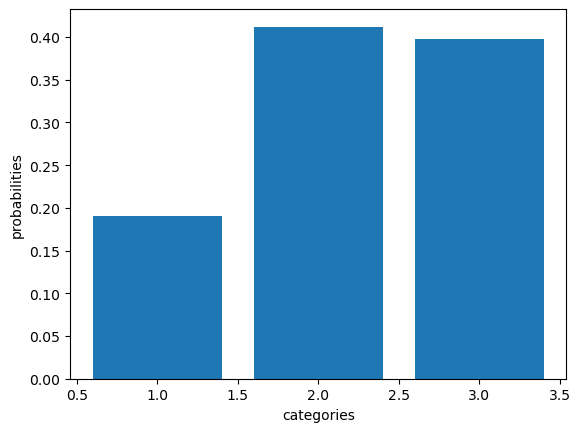

In [10]:
from torch.distributions import Categorical
probs=torch.tensor([0.20,0.40,0.40])
categorical_distribution = Categorical(probs)
categorical_numbers = categorical_distribution.sample((1000,))
category_counts = torch.bincount(categorical_numbers) #Bincount:count the number of occurrences of each value                                                       #of occurrences of each value
probabilities = category_counts / 1000
categories = torch.arange(1,len(probabilities)+1)
plt.bar(categories, probabilities)
plt.ylabel("probabilities")
plt.xlabel("categories")

****CDF of Categorical distribution****

tensor([0.2000, 0.6000, 1.0000])


Text(0.5, 0, 'categories')

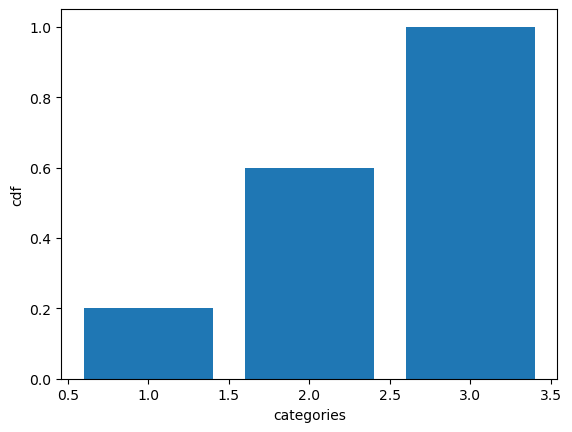

In [11]:
probs=torch.tensor([.20,.40,.40])
cdf = torch.cumsum((probs),dim=0)
print(cdf)
categories = torch.arange(1,len(probabilities)+1)
plt.bar(categories,cdf)
plt.ylabel("cdf")
plt.xlabel("categories")

****Inverse CDF of Categorical distribution****

### Poisson distribution

## Univariate continuous distributions

### Normal distribution 

****Definition**** : The normal distribution arises when many small factors contribute to a quantity without any extreme variations, resulting in a bell-shaped curve.

****PDF**** :

$$
f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

****Support**** : ($-\infty$ to $+\infty$)

****CDF**** : $$F_X(x) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x - \mu}{\sqrt{2}\sigma}\right) \right]$$

****Inverse CDF****: $$Q_X(p) = \sqrt{2\sigma} \cdot \text{erf}^{-1}(2p - 1) + \mu$$


Text(0.5, 0, 'x')

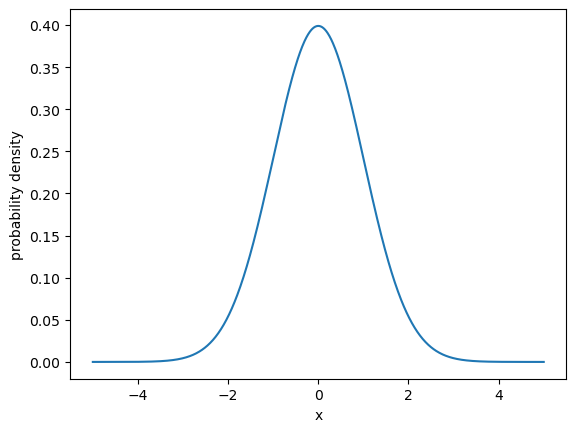

In [86]:
from torch.distributions import Normal
mean = torch.tensor([0.0])
stddev = torch.tensor([1.0])
normal_dist = dist.Normal(mean, stddev)
a = -5
b = 5
x = torch.linspace(a,b,1000)
pdf = torch.exp(normal_dist.log_prob(x))
plt.plot(x, pdf)
plt.ylabel("probability density")
plt.xlabel("x")


****CDF of Normal distribution****

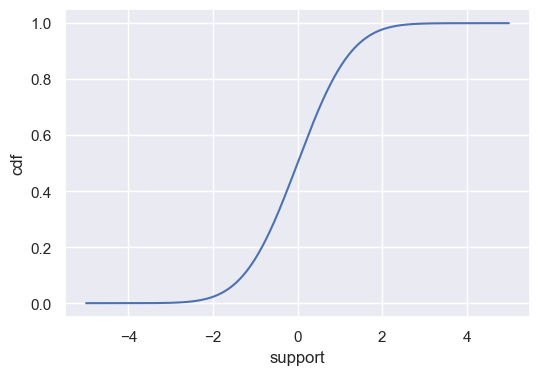

In [244]:
from scipy.stats import norm
a = -5
b = 5
x = torch.linspace(a,b,1000)
def f(x):
    return norm.cdf(x, loc=0, scale=1)
plot(x,f(x))


****Inverse CDF of Normal distribution**** 

Text(0, 0.5, 'Inverse CDF')

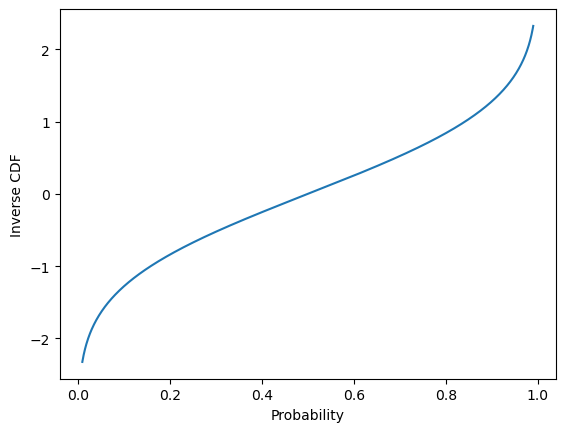

In [88]:
a = 0.01
b = 0.99
x = torch.linspace(a,b,1000)
inv_cdf = norm.ppf(x, loc=0, scale=1)
plt.plot(x, inv_cdf)
plt.xlabel('Probability')
plt.ylabel('Inverse CDF')

### Beta distribution

***Definition*** : Let's say you have two processes, each consisting of multiple steps. Both processes occur at the same rate, but the first process requires $\alpha$ step and the second process $\beta$ ,the fraction of the total waiting time taken by the first process is Beta distributed .

****PDF****: 
$$f(x; \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)}$$

where 

$$B(\alpha, \beta) = \int_0^1 x^{\alpha-1} (1-x)^{\beta-1} dx$$

***Support*** : [0, 1].

****CDF**** : 
$$F_X(x) = \frac{B(x; \alpha, \beta)}{B(\alpha, \beta)}$$

where ${B(a, b)}$ is the beta function and $B(x; \alpha, \beta)$ is the incomplete gamma function.





****PDF of beta distribution**** :

Text(0, 0.5, 'pdf')

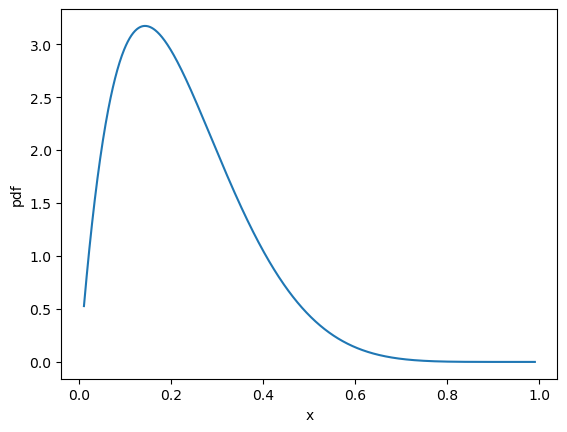

In [90]:
alpha = 2
beta = 7
beta_dist = torch.distributions.Beta(alpha, beta)
x = torch.linspace(a,b,1000)
pdf = beta_dist.log_prob(torch.tensor(x)).exp()
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("pdf")


****CDF of beta distribution**** :

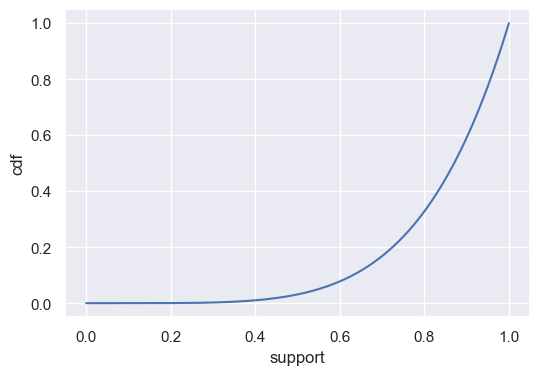

In [263]:
import scipy.stats as stats
x = torch.linspace(0,1,1000)
def cdf_fn(x):
    alpha = 5.0  
    beta = 1.0   
    return stats.beta(alpha, beta).cdf(x)
plot(x, cdf_fn(x))

****Inverse CDF of Bata distribution****

Text(0, 0.5, 'inverse_cdf')

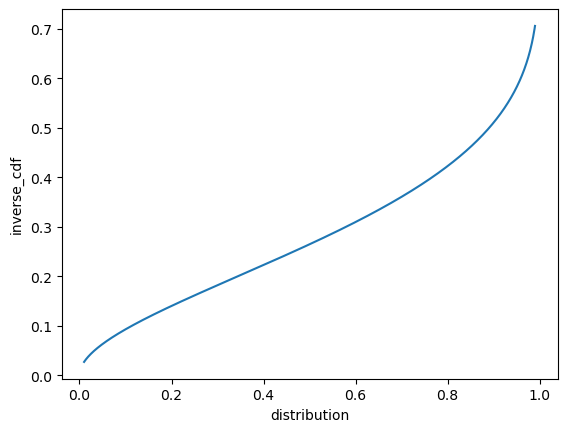

In [93]:

alpha = 2.0
beta = 5.0
distribution=torch.linspace(a,b,1000)
inverse_cdf = stats.beta.ppf(distribution, alpha, beta)
plt.plot(distribution, inverse_cdf)
plt.xlabel('distribution')
plt.ylabel('inverse_cdf')


### Gamma distrubution


 Let $X$ be a random variable. Then, $X$ is said to follow a gamma distribution with shape a and rate $b$
 $$X \sim \text{Gamma}(a, b)$$

****PDF**** : $$f(x; a, b) = \frac{b^a}{\Gamma(a)} x^{a-1} e^{-bx}, \quad x > 0$$ where
$a>0$ and $b>0$

****CDF****: 
$$F_X(x) = \frac{\gamma(a, bx)}{\Gamma(a)}$$
where $\Gamma(a)$ is the gamma function and $\gamma(a, bx)$ is the lower incomplete gamma function.

****Inverse CDF**** : 
$$Q_X(p) = \begin{cases}
-\infty, & \text{if } p = 0 \\
\gamma^{-1}(a, \Gamma(a) \cdot p) / b, & \text{if } p > 0
\end{cases}
$$


***PDF of Gamma distribution****

Text(0, 0.5, 'pdf')

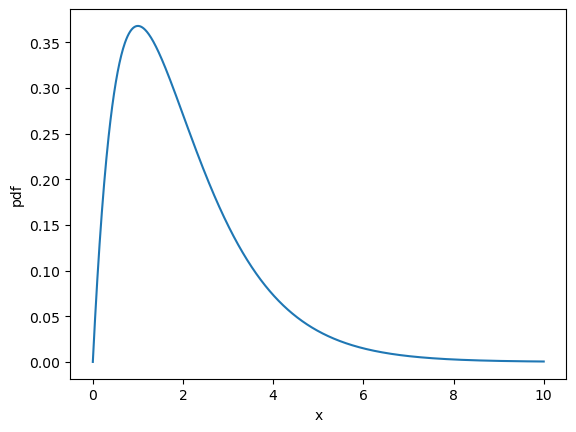

In [105]:
alpha = 2.0
beta = 1.0
gamma_dist = torch.distributions.Gamma(alpha, beta)
x = torch.linspace(0,10,1000)
pdf = gamma_dist.log_prob(x).exp()
plt.plot(x,pdf)
plt.xlabel("x")
plt.ylabel("pdf")

****CDF of Gamma distribution****

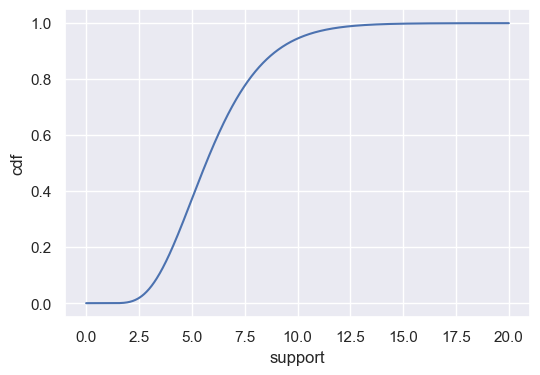

In [276]:
x = torch.linspace(0,20,1000)
def cdf_fn(x):
    alpha = 5.0 
    beta = 1.0   
    return stats.gamma(alpha, beta).cdf(x)
plot(x, cdf_fn(x))

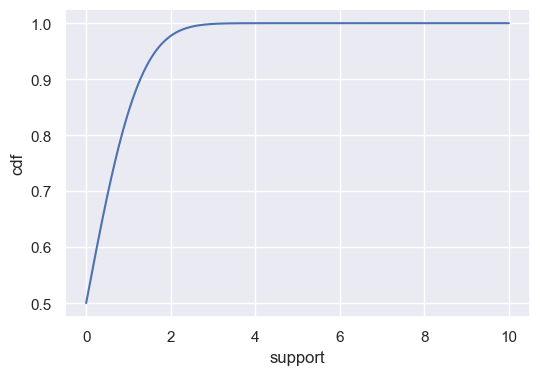

In [238]:
shape = 7.5 
scale = 1.0 
x = torch.linspace(0,10,1000)
gamma_dist=stats.gamma(shape,scale)
def cdf_fn(x):
    return gamma_dist.cdf(x)
plot(x,cdf_fn(x))

****Inverse CDF of Gamma distribution****

Text(0, 0.5, 'inverse cdf')

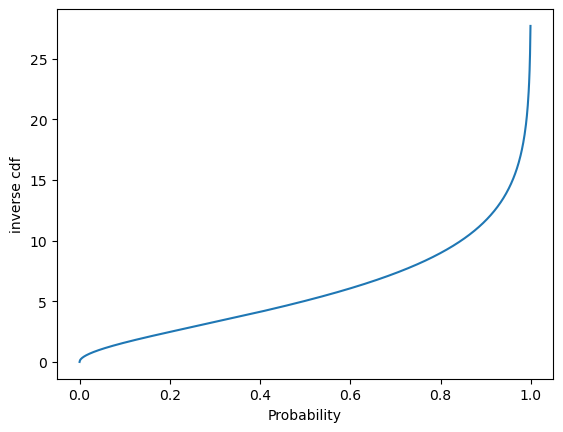

In [119]:
shape = 2.0   
scale = 3.0  
gamma_dist = stats.gamma(shape, scale=scale)
p = torch.linspace(0,1,1000)
quantiles = gamma_dist.ppf(p)
plt.plot(p,quantiles)
plt.xlabel('Probability')
plt.ylabel('inverse cdf')

### Implementing a pseudo-random number generator (PRNG)

**Implementing a pseudo-random number generator (PRNG)** - Generates a sequence of numbers that exhibit properties of randomness

**Linear Congruential Generator (LCG)** is a simple PRNG algorithm - The LCG algorithm is defined by the recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ is the Next pseudo-random number.
- $X_n$ is the current pseudo-random number.
- $a$ is the multiplier , determines the period of the generated number.
- $c$ is the increment, shifts the generated sequence.
- $m$ is the modulus, determines the range of values .


***Integer Constant***

$m,{0<m}$ — The modulus

$a,0<a<m$ — The multiplier

$c,0<=c<m$ — The increment

$X_{0},0<X_{0}<m$ — The seed / start value



Text(0, 0.5, 'Frequency')

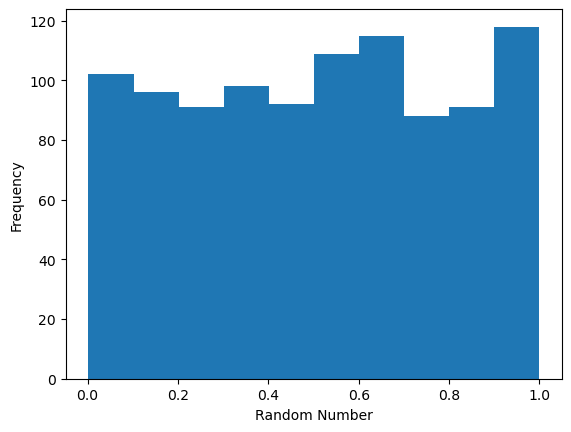

In [128]:
# Function for Linear Congruential Generator
def lcg(seed, n_samples):
    """
    Generates a sequence of pseudo-random numbers using the Linear Congruential Generator (LCG) algorithm.

    Args:
        seed (int): The seed value for the LCG algorithm.
        n_samples (int): The number of random numbers to generate.

    Returns:
        list: A list of pseudo-random numbers normalized to the range [0, 1].
    """
    a = 1103515245
    c = 12345
    m = 2 ** 31
    random_numbers = []

    for _ in range(n_samples):
        seed = (a * seed + c) % m
        random_number = seed / m  # Normalize to range [0, 1]
        random_numbers.append(random_number)

    return random_numbers
random_numbers = lcg(seed=42, n_samples =1000)
plt.hist(random_numbers )
plt.xlabel('Random Number')
plt.ylabel('Frequency')


### Uniform distribution to Normal sampling

### Box Muller Method

In [23]:
def uniform_to_normal_boxmuller(n_samples):
    """
    Generates a sequence of pseudo-random numbers from a standard normal distribution using the Box-Muller method.

    Args:
        n_samples (int): The number of random numbers to generate.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the standard normal distribution.
    """
    uniform_distribution = dist.Uniform(0, 1)
    random_numbers = []

    for _ in range(n_samples // 2):
        u1 = uniform_distribution.sample()
        u2 = uniform_distribution.sample()

        z1 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * math.pi * u2)
        z2 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * math.pi * u2)

        random_numbers.append(z1)
        random_numbers.append(z2)

    if n_samples % 2 != 0:
        u = uniform_distribution.sample()
        z = torch.sqrt(-2 * torch.log(u)) * torch.cos(2 * math.pi * uniform_distribution.sample())
        random_numbers.append(z)

    return torch.stack(random_numbers)

### Uniform distribution to beta sampling  

$$x = (1-u) \cdot \alpha_1^{-1} \cdot u \cdot \beta_1^{-1}$$


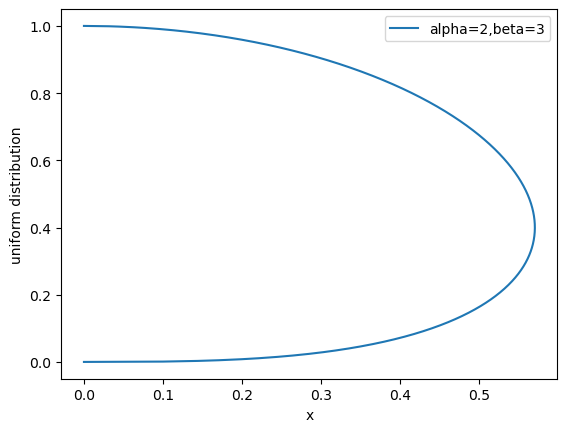

In [138]:
alpha=2
beta=3
u = torch.linspace(0,1,1000)
x=(1-u)**(1/alpha) * u**(1/beta)
plt.plot(x,u)
plt.xlabel("x")
plt.ylabel("uniform distribution")
plt.legend(['alpha=2,beta=3']);


### uniform to gamma distribution 

$$x = (-\log(1-u)) \cdot \text{shape}^{-1} \cdot \text{scale}$$


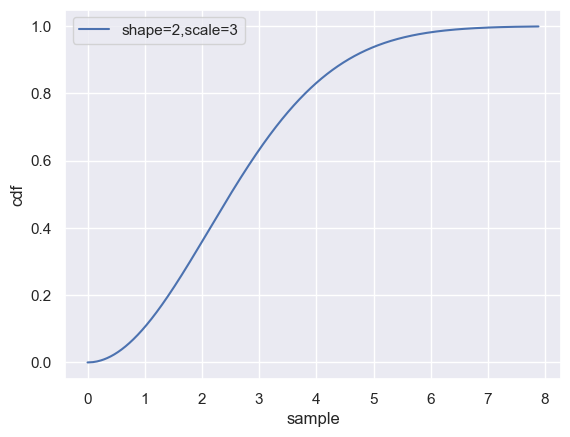

In [168]:
shape=2
scale=3
u = torch.linspace(0,1,1000)
x=(-torch.log(1 - u)).pow(1 / shape) * scale
plt.plot(x,u)
#plt.h(u)
plt.xlabel("sample")
plt.ylabel("cdf")
plt.legend(['shape=2,scale=3']);


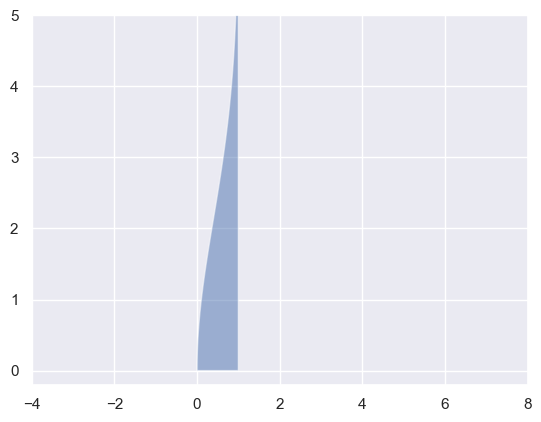

In [166]:
from scipy.stats import norm
x_d = torch.linspace(0,1,1000)
density = (-torch.log(1 - u)).pow(1 / shape) * scale

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x_d, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);